# <lista argomenti>
 

# Capitolo 5.2


# 1. **Ret Neurali per nlp**

- **Feed forward neural Network**
    - Neural unit:
        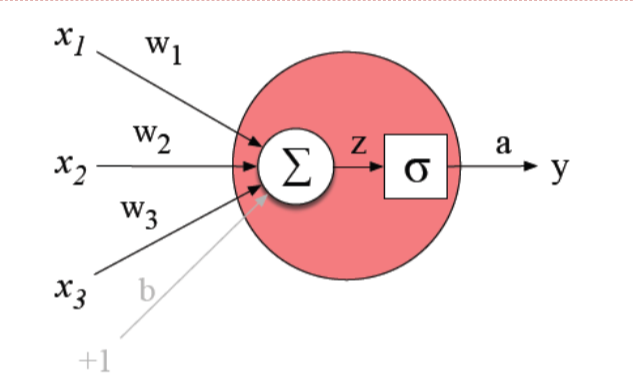
        - $y = \sigma(Wx + b)$
            - output of the neural unit;
        - $x = (x_1,..,x_n)$ is the input of the neural unit;
        - $W$ is the weight matrix of the neural unit;
        - $b$ is the bias vector of the neural unit;
        - $z = Wx + b$ is the linear combination of the input and the weight matrix plus the bias vector.     
        - $f(z) = \sigma(z)$ is the activation function of the neural unit, where $\sigma$ is the sigmoid function.
             
        - other Activation function
            - tanh: $f(z) = tanh(z)$
            - ReLU: $f(z) = max(0, z)$  
        - the activation function is used to introduce non-linearity in the neural network.
        - need non-linearity because the composition of linear functions is a linear function, and otherwise we dont have one W matrix for each layer but only one W matrix for all the layers: $ W = W_1W_2...W_n$.
        - the union of more neural unit without activation function would be the same of linear regression.

    - FFNN is multilayer network with each layer composed of multiple neural units. 
    There is at least a hidden layer, and every layer's output is the input of the next layer.
    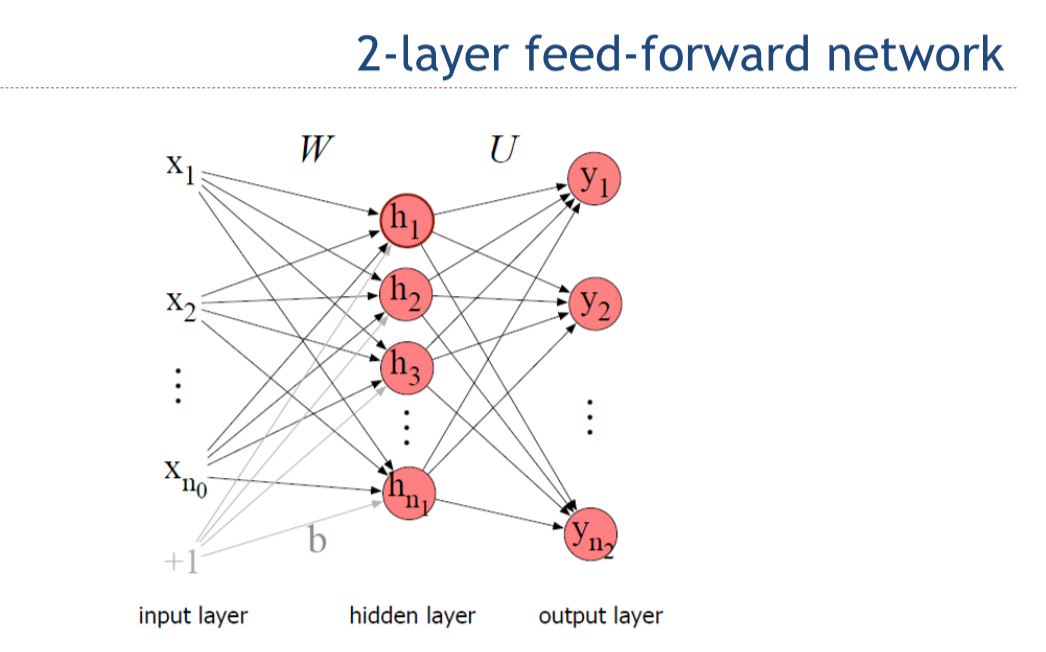
    - $h = \sigma(Wx + b)$
    - $z = U\times h$
    - $y = softmax(z)$
    - softmax is used to normalize the output of the network in a probability distribution.
    - suppose to have a network with 3 layers:
        - input layer: $x = (x_1, x_2, x_3)$
        - hidden layer: $h = (h_1, h_2, h_3)$
            - $h_1 = \sigma(W_{11}x_1 + W_{12}x_2 + W_{13}x_3 + b_1)$
            - $h_2 = \sigma(W_{21}x_1 + W_{22}x_2 + W_{23}x_3 + b_2)$
            - $h_3 = \sigma(W_{31}x_1 + W_{32}x_2 + W_{33}x_3 + b_3)$
        - output layer: $y = (y_1, y_2, y_3)$
            - $y_i = \sigma(U_{i1}h_1 + U_{i2}h_2 + U_{i3}h_3 + b_i)$
        - $softmax(y) = (\frac{e^{y_1}}{\sum_{i=1}^{3}e^{y_i}}, \frac{e^{y_2}}{\sum_{i=1}^{3}e^{y_i}}, \frac{e^{y_3}}{\sum_{i=1}^{3}e^{y_i}})$
        - the output with softmax generate a probability distribution for each class to classify.
    
    - W are the weight matrix of the layer;
    - dimension of W is (n x m), where n is the number of neurons in the current layer and m is the number of neurons in the previous layer;
    - b dim is (n x 1);
    - U is the weight matrix of the output layer;
    - dim of U is (k x n), where k is the number of classes and n is the number of neurons in the previous layer;
    
- **FNN for NLP (Classification)**:
    - We want to classify a sentence in a class.
    - We need to represent the sentence as a vector.
    - in every case of embedding we have a matrix of size (V x d), where V is the size of the vocabulary and d is the dimension of the embedding.
    - usually we work with sentences and not with words, so we need to represent the sentence as a vector.
    - we need to represent the sentence of word as a single vector.

 
- **Pooling**:
    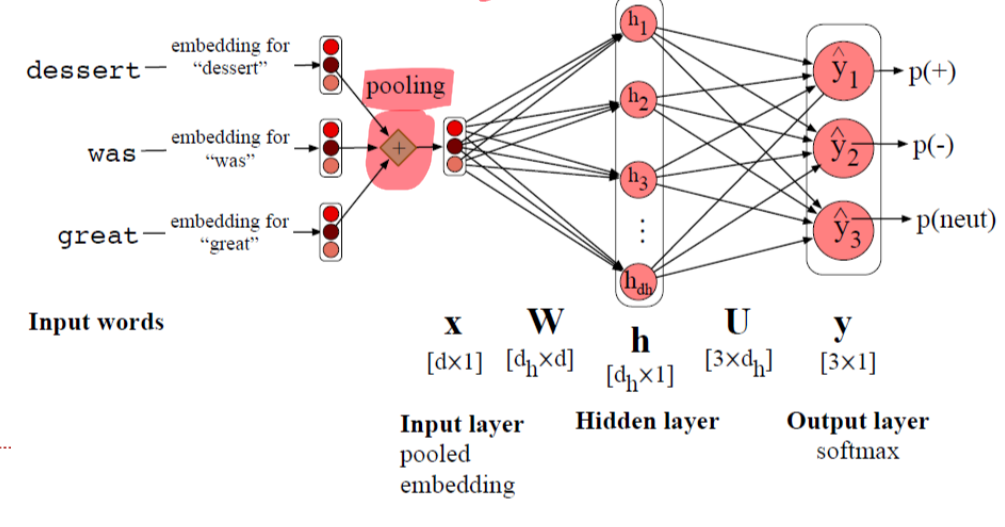
    - there is various way to rappresent a sequence of vectors as a single vector in order to classify the sequence.
    - we can concatenate all the vectors in the sequence and use the concatenation as a single vector.
        - can be not a good idea because the dimension of the vector is too big.
    - Pooling is a way to represent a sequence of vectors as a single vector.
    - Given a sequence of words $x_1, x_2, ..., x_n$.
    - typically two type of pooling:
        - 1) **Max Pooling**:
            - $x_{pooled} = max(x_1, x_2, ..., x_n)$
            - $x_{pooled}$ is the vector of the max of all the words in the sequence.
        - 2) **Average pooling**
            - $x_{pooled} = \frac{1}{n}\sum_{i=1}^{n}e(x_i)$
            - $x_{pooled}$ is the average of all the words in the sequence.

- coming back to the classification task:
    - given for ex $x_{pooled} = mean(e(x_1), e(x_2), ..., e(x_n))$ as the pooled representation of the sentence.
    - $h = \sigma(Wx_{pooled} + b)$
    - $z = Uh$
    - $y = softmax(z)$

- if we want classify a test set of m examples:
    - all input sequence are packed in a matrix X of size (m x d), where m is the number of examples and d is the number of attribute of $x_pooled$.

    - ex of X Matrix: $X = \begin{bmatrix} x_{pooled_1}^{(1)} ... x_{pooled_d}^{(1)} \\ ... \\ x_{pooled_1}^{(m)} ... x_{pooled_d}^{(m)} \end{bmatrix}{m \times d}$

            

- **Feedforward Neural LM**
    - the input at time t of the network is a sequence of words $w_1, w_2, ..., w_t$.
    - the output at time t of the network is the probability distribution of the next word $w_{t+1}$.
    - $ P(w_{t+1}|w_1, w_2, ..., w_t) $
    - assuming the words are independent:
        - $ P(w_{t+1}|w_1, w_2, ..., w_t) = \prod_{i=1}^{t}P(w_{i+1}|w_1, w_2, ..., w_i) = P(w_2|w_1)P(w_3|w_1, w_2)...P(w_{t+1}|w_1, w_2, ..., w_t) $
        
    - so for a sequence of word the probability is:
        - $ P(w_1, w_2, ..., w_n) = \prod_{t=1}^{n}P(w_t|w_1, w_2, ..., w_{t-1}) $
    
- Because NLM rapresent words by their embedding rather than word identity as in n-gram LM
- word identity in n-gram LM is a sparse representation
- sparse representation is not good for generalization because we have a lot of unseen words.
- Using embedding allows NLM to generalize better unseen words. 

        


- **Forward inference**
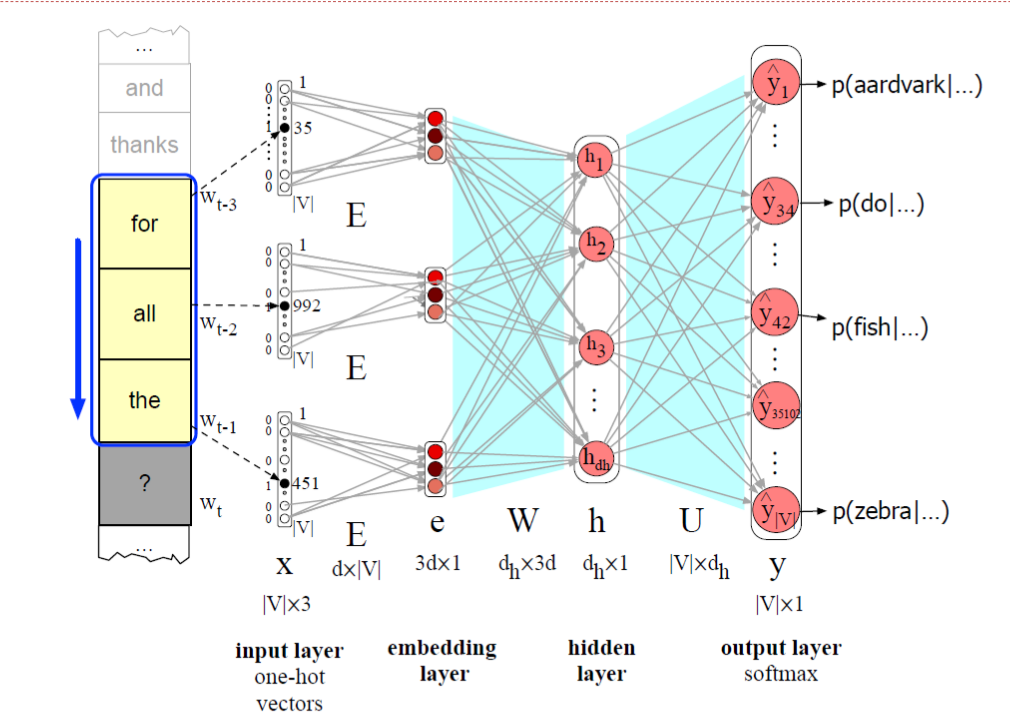
- F.inf. aka decoding:
    - is the task, given a sequence of words, to predict the next word.
    - each word is a one-hot vector of length V (one for each word in the vocabulary).
    - Embedding matrix E has a column for each word in the vocabulary and each column is the embedding of the word.
    - example of multipliction of one-hot vector with Embedding matrix:
        - $e(w_1) = E\times w_1$
        - $ w_1 = [0, 0, 1]$
        - $ E = \begin{bmatrix} 0.1 & 0.2 & 0.3 \\ 0.4 & 0.5 & 0.6 \\ 0.7 & 0.8 & 0.9 \end{bmatrix}$
        - $ e(w_1) = (0*0.1 + 0*0.4 + 1*0.7, 0*0.2 + 0*0.5 + 1*0.8, 0*0.3 + 0*0.6 + 1*0.9) = (0.7, 0.8, 0.9)$
        - multiply one-hot vector with only one nonzero el. and embedding matrix
        - this multiplication selects out relevant column of the embedding matrix for word wi.
        - Result is the embedding of the word wi.
- **Training Neural nets**:
    - we need loss function to train the network to understand the distance between the prediction and the true label.
    - common loss function for classification task is the cross entropy loss.
    - $L = -\sum_{i=1}^{k}y_ilog(\hat{y_i})$
    - where:
        - $y_i$ is the true label;
            - in case of language model is the next word of source sentence.
        - $\hat{y_i}$ is the predicted label;
            - in case of language model is the probability distribution over the vocabulary of the possible next word.
        - k is the number of classes.
            - in case of language model is the size of the vocabulary.
         

    - we need to minimize the loss function.

(Non rihiesta per esame)
- BACKPROPAGATION:
    - is the algorithm to compute the gradient of the loss function with respect to the parameters of the network.
    - we need to update the parameters of the network to minimize the loss function
    - to do that we use the gradient descent.
    - we need to compute the gradient of the loss function with respect to the parameters of the network: $ \nabla{\omega}L = (\frac{\partial L}{\partial \omega_1}, \frac{\partial L}{\partial \omega_2}, ..., \frac{\partial L}{\partial \omega_n})$
        - $\omega$ is the parameter of the network.
        -  we use the chain rule to compute the gradient.
        - $ \frac{\partial L}{\partial \omega} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial \omega} $
        - $\omega_{new} = \omega_{old} - \eta\frac{\partial L}{\partial \omega}$
        - $\eta$ is the learning rate.

    - this process is repeated until the loss function is minimized or until the number of epochs of training is reached.



# 2. **RNN**
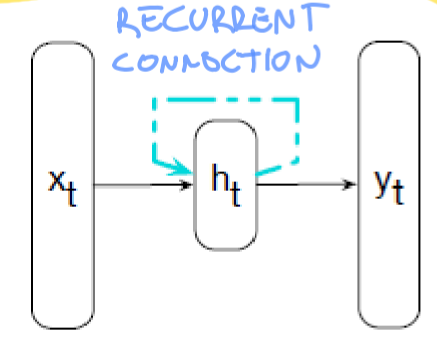

 - RNN are a class of neural network that can model sequential data.
 - different from feedforward neural network is the recurrent connection.
 - recurrent connection allows the network to maintain information about the past.
 - is a form of memory.
 - memory is stored in a hidden state vector h.
 - hidden state is computed as:
    - $h_t = f(Uh_{t-1} + Wx_t)$
    - $h_t$ is the hidden state vector at time t;
    - $h_{t-1}$ is the hidden state vector at time t-1;
    - $x_t$ is the input vector at time t;
    - $U$ is the weight matrix for the recurrent connection;
    - $W$ is the weight matrix for the input;
    - f is the activation function as sigmoid, tanh or relu.
    - the hidden state is in the hidden layer.
    - in LM the hidden state is the context of the sentence.
    - critical aspect: approach that does not impose a fixed length limit on previous context.
        - unlimited context is problematic because the hidden state vector loses information about the beginning of the sequence.
    - in fact h is a summary with loss of information of the past.

    - hidden state vector is updated at each time step;
    - so after a certain number of time steps the h will not contain information about the beginning of the sequence.
    
    - A schematic representation of the RNN:
    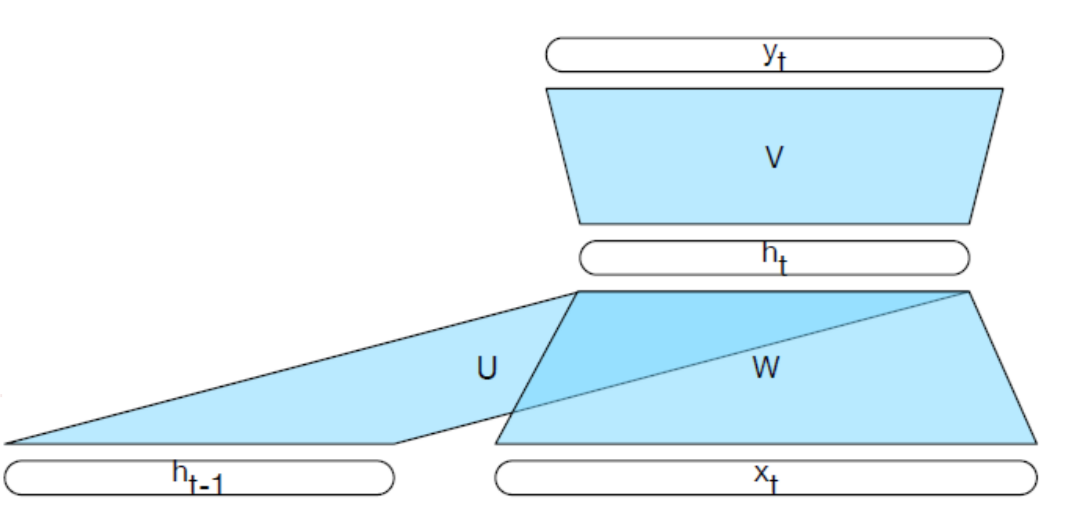
 
 - **Inferenza in RNN as LM**
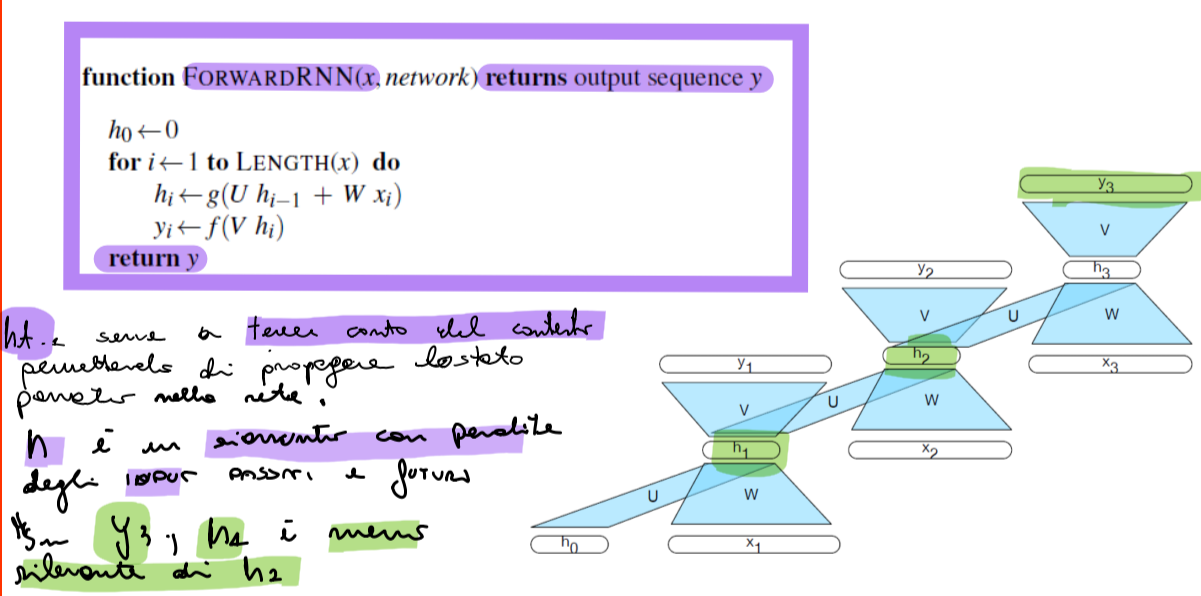
  - similar to feedforward neural network.
    - the difference is that the input $x_t = [x_1, x_2, ..., x_t]$ is a sequence of words embedded in a vector space.
        - each word is a one-hot vector of length V (one for each word in the vocabulary).

    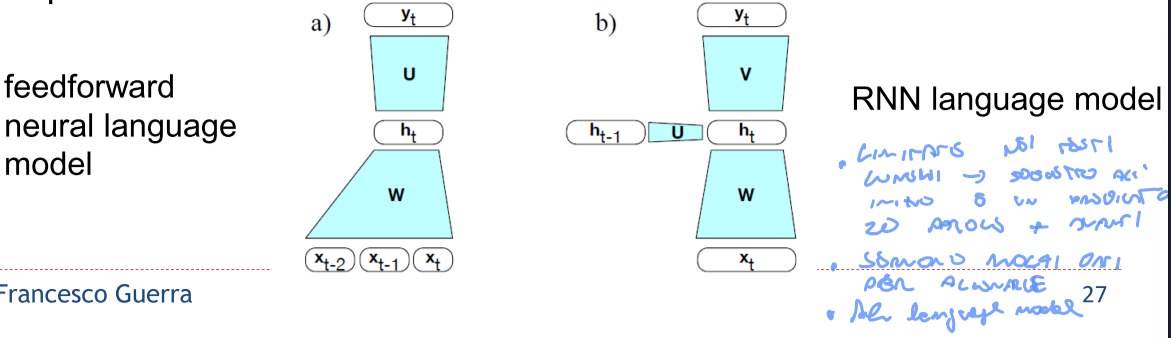
    - the output $y_t$ is a probability distribution over the vocabulary of the possible next word.

    - giving input with dimension $d_{in}$ 
        - $ x_t = [x_1, x_2, ..., x_{d_{in}}]$

    - hidden layer with dimension $d_{h}$
        - $h_t = [h_1, h_2, ..., h_{d_{h}}]$

    - output is a vector with dimension $d_{out}$.
        - $y_t = [y_1, y_2, ..., y_{d_{out}}]$

    - $h_t = f(Uh_{t-1} + Wx_t)$

        - $W$ is the weight matrix for the input of dimension $d_{h} \times d_{in}$;
        - $U$ is the weight matrix for the recurrent connection of dimension $d_{h} \times d_{h}$;

    - $y_t = f(Vh_t)$

        - $V$ is the weight matrix for the output of dimension $d_{out} \times d_{h}$;
        - $f$ is usually a softmax function
        - $y_t = softmax(Vh_t)$

- RNN lenguage model process for each time step:

    - use word matrix E to retrieve the embedding of the current word $x_t$;

        - $ e_t = Ex_t$

    - combining with the previous hidden state $h_{t-1}$ to compute the new hidden state $h_t$;

        - $h_t = f(Uh_{t-1} + e_t)$

    - generate output layer from the hidden state $h_t$;

        - $o_t = Vh_t$

    - compute the probability distribution over the vocabulary of the possible next word;

        - $y_t = softmax(o_t)$

    - Training process:    

    - this is a self-supervised learning approach.

    - so the training data is unlabeled.

    - the label is the next word in the input sequence, to be compared with the output of the network. 

    - compute the loss function and minimize it with backpropagation (through time).
    
    - using Teacher forcing: the input at time t is the true label at time t-1.
        - $x_t = y_{t-1}$
 

 - Weight tying: 

    - Use the same embedding matrix and output weight matrix($V = E^T $).

    - $e_t = Ex_t$
    
    - $h_t = f(Uh_{t-1} + We_t)$
    
    - $y_t = softmax(E^Th_t)$

    
    - this is useful because:
    
    - E and V are trained to do the same thing
    
    - E provides a embedding for each input word
    
    - V provide an embedding for all the next possible words
    
    - Using $$V = E^T$$ we use a single set of embedding weights for both the input and output layers.
    
    - reduces the number of parameters to train.
    
    - improves the performance of the model.
    

 - RNN for Sequence classification
    
    - perform text classification as: 
    
        - sentiment analysis;
        - spam detection;
    
    - Give a sequence of words, predict a single label.

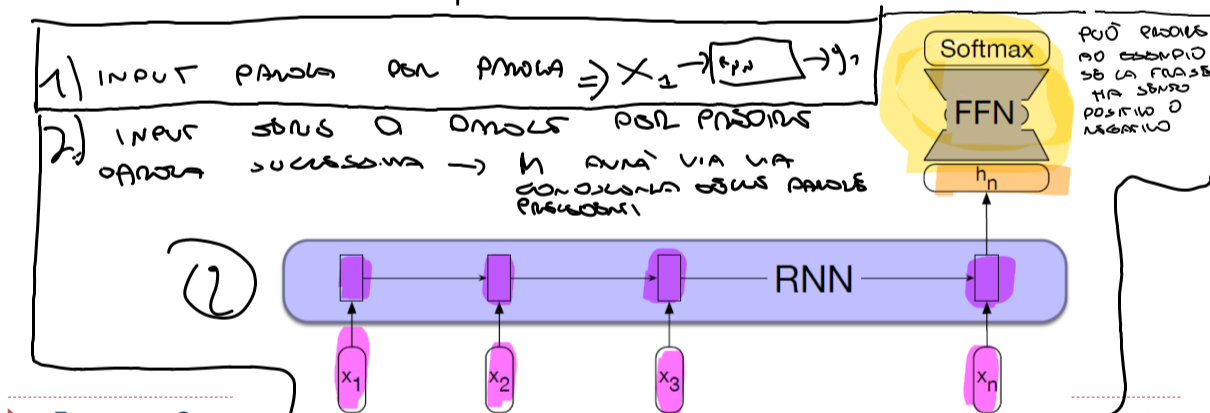

Rnn's are difficult to train because of vanishing  and exploding gradient problem.
Lose information about the beginning of the sequence.

# **3. LSTM**:

why lstm is introduced? 

- to solve the problem of vanishing gradient and exploding gradient.

    - Maintain the context over the time.
    - removing information no longer needed from context
    - adding new information likely to be needed for later decision making.

- To manage the context, LSTM use gates.

- Gates are neural network layer that control the flow of information.

- Gates are composed of

    - feedforward layer;
    
    - sigmoid neural net layer 
        - push output values between 0 and 1;

    - pointwise multiplication operation 

        - combining this operation with sigmoid layer 

            - have effect similar to a binary mask 
            - allow or block information flow.

- **Gates**:
    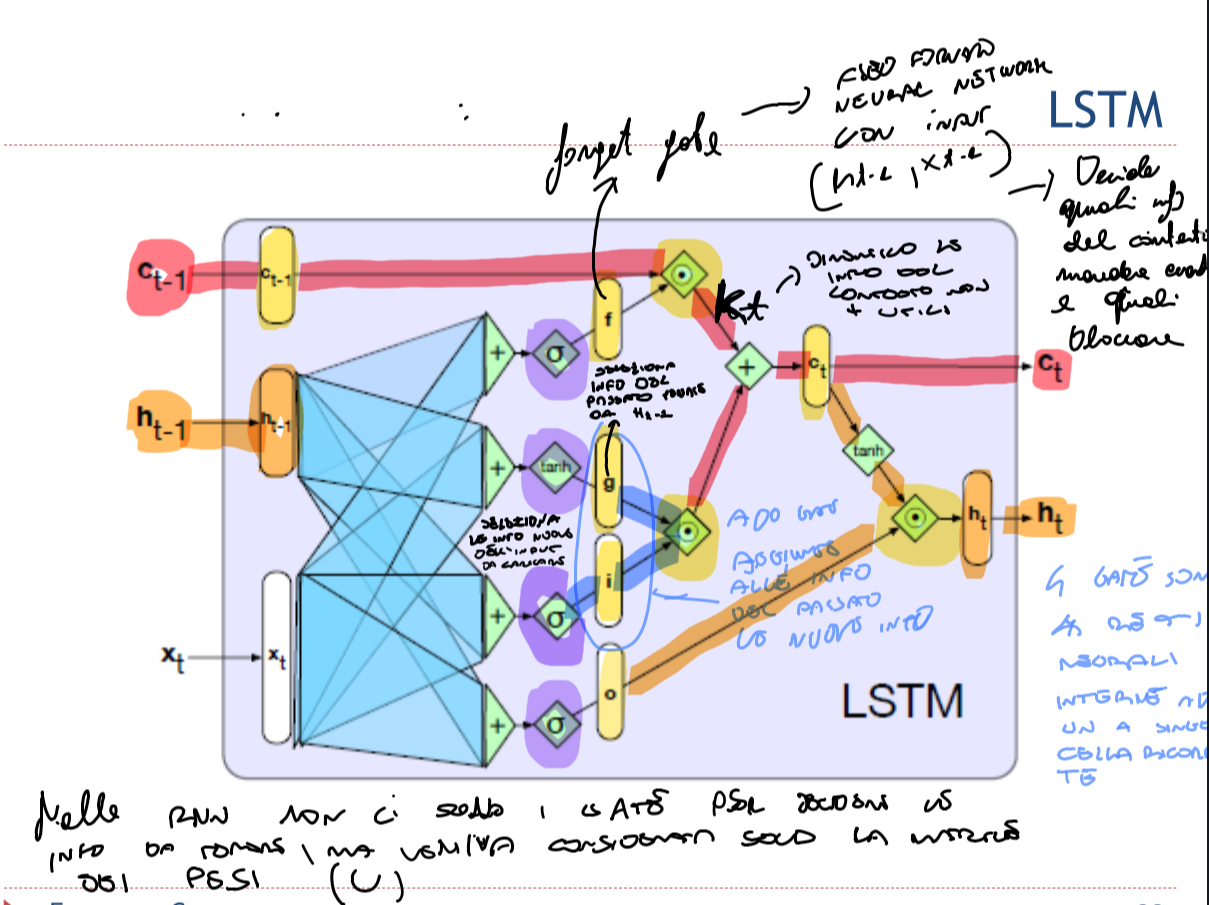

    - **forget gate**: compute what information to discard from the context vector.(info no longer needed)
    - $f_t = sigmoid(Uf *h_{t-1} + Wf*x_t)$ 

    - Modidfied context vector: 
    $k_t = c_{t-1} \odot f_t$ (what delete from previous context vector)
    - $g_t$ -> **select candidate state**:
        select what new information to add from current input and previous hidden state.

        - $g_t = tanh(Ug * h_{t-1} + Wg * x_t)$

    - **input gate**: 
        - $i_t = sigmoid(Ui * h_{t-1} + Wi * x_t)$

    - **add gate**: 
    select what information to add to the context vector from the candidate state.
        - $j_t = g_t \odot i_t$ (add gate)
    - **output gate**: 
    *used to decide what information is required for the current hidden state.*
        - $o_t = sigmoid(Uo * h_{t-1} + Wo * x_t)$
    - **new context vector**
        - $c_t = k_t + j_t$
    - **New hidden state**: 
        - $h_t = o_t \odot tanh(c_t)$

- **Common RNN NPL Architectures**:
    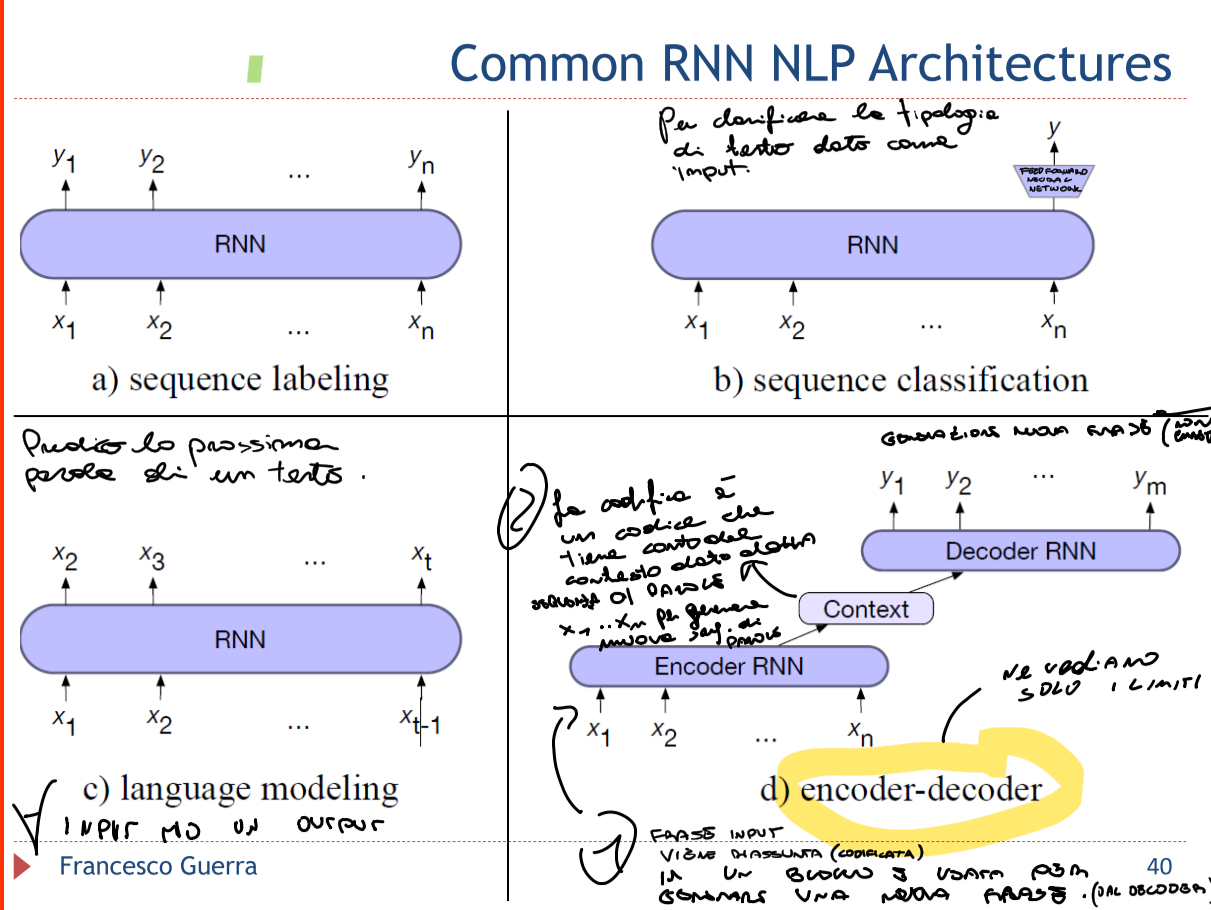

    - a) Sequence labeling (x1 -> y1, x2 -> y2, ...);

    - b) Sequence classification (x1, x2, ... -> y);

    - c) language modeling (x1 -> x2, x2 -> x3, ...);

    - d) encoder-decoder (x1, x2, ... -> y1, y2, ...);
    - $p(y|x) = $
    - $p(y1|x1)p(y2|x1, y1)p(y3|x1, y2, y3)...p(y_m| x1, ..., y_m) = p(y|x)$
    - $= \prod_{t=1}^{m} p(y_t|x, y_1, ..., y_{t-1})$
    - x is source sentence
    - y is target sentence.
    

- **Encoder-Decoder model with RNNs**:
    - take input sequence arbitrary length;
    - traslate it into another sequence of arbitrary length.;
    - task can be solved with encoder-decoder architecture:
        - summarization (input: long text, output: short text);
        - machine translation (input: text in one language, output: text in another language);
        - question answering (input: question, output: answer, as gpt3);

    - Encoder (can be LSTMs, CNN, Transformer):
        - 1) take input sequwnce $x = (x_1, ..., x_n)$; and generate a contextualized representation of the input sequence $h = (h_1, ..., h_n)$; 
        - 2) context vector $c$ is derived from the final hidden state of the encoder $h_n$;
        - 3) $c$ is essence of the input to the decoder.
    - Decoder (can be every model that can generate sequence):
        - 4) Decoder generates from $c$ a arbitrary length of hidden states $h = (h_1, ..., h_m)$;
        - 5) $h$ is used to generate the output sequence $y = (y_1, ..., y_m)$;

- RNN lenguage modeling for each timestep $t$:
    - pass $t-1$ token through embedding layer;
    - Use forward inference to compute sequence of hidden states;
    - Use final hidden state to compute probability distribution over vocabulary;
        - $h_t = g(h_{t-1}, x_t)$
        - $y_t = f(h_t)$

- Thus giving:

    - x: source text;
    - y: target text;

- we get:

$p(y|x) = p(y1|x)p(y2|x, y1)p(y3|x, y1, y2)...p(y_m|x, y_1, ..., y_{m-1}) = \prod_{t=1}^{m} p(y_t|x, y_1, ..., y_{t-1})$

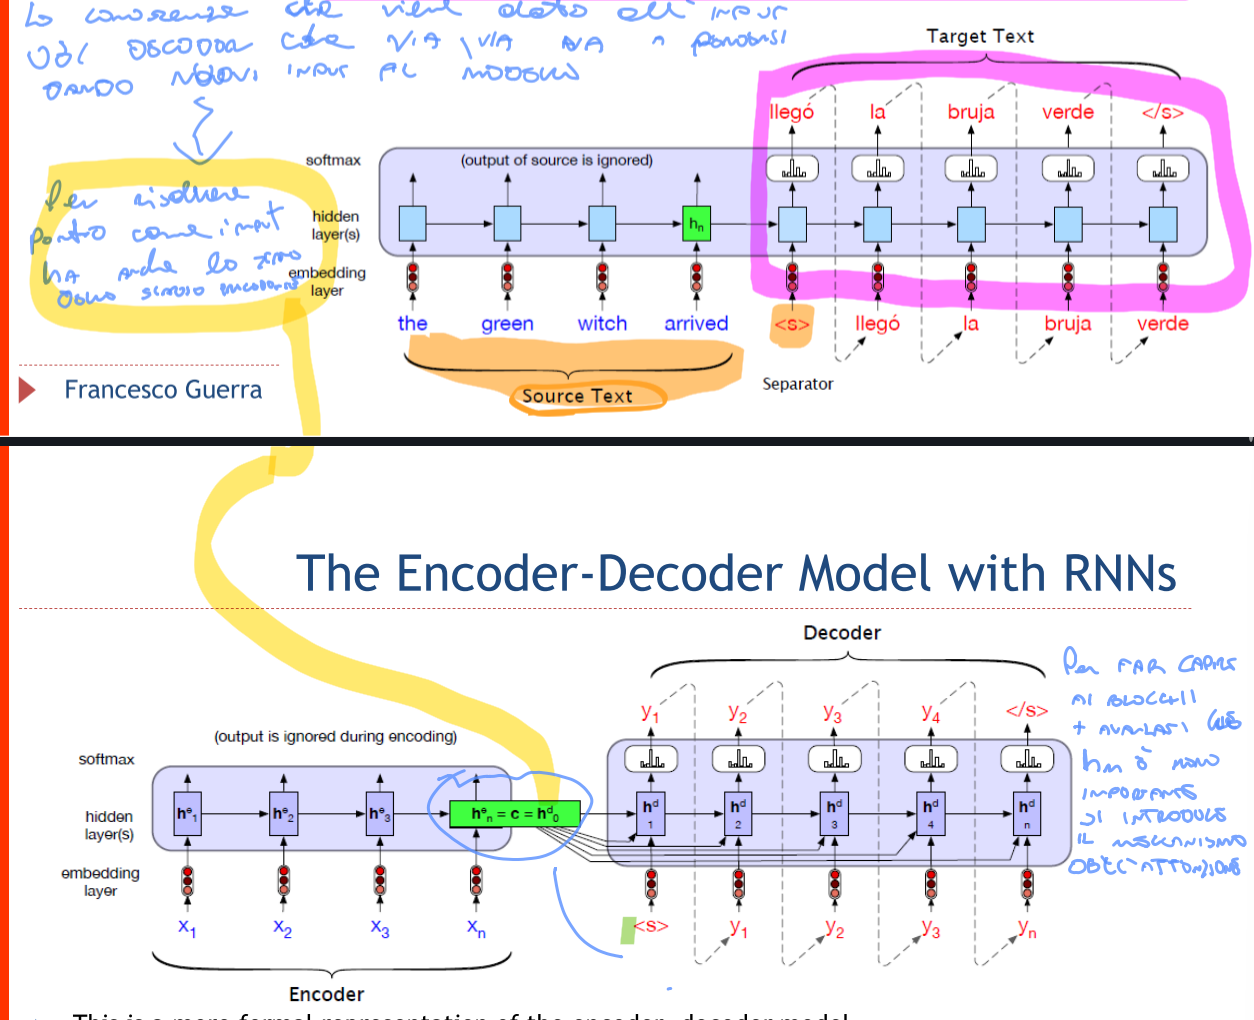


- Rnn's have problem of context influence in long term dependencies from source to target sentence.

- Introduction of attention mechanism to solve this problem.

# 4. **Attention mechanism**:

- allowing decoder to look at all the source words at each step of the decoding process.

- I.e. decoder get info from all hidden states of encoder, not just the last one.

    - **idea**: 

        - create context vetor $c_t$ as single-fixed length, taking a weighted sum of all the hidden states of the encoder.

        - weight select relevant part of the source sentence, as the decoder generate tokens of the target sentence.

        - encoder hidden state are different for each token in decoder -> context vector is dynamically derived at each step of decoding from the hidden states of the encoder.

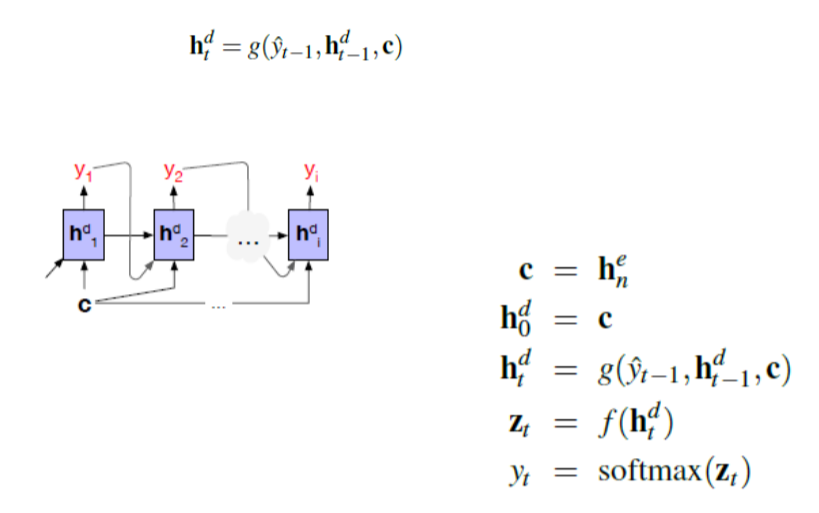

- computing $C_i$ consider:

    - how to focus on each encoder hidden state $he$.

    - how relevant each encoder hidden state is to the current decoder hidden state $hd_{i-1}$.

        - introduce score to measure the relevance of each encoder hidden state during the decoding process.


- **simplest score function** (dot product attention (degree of similarity)):

    - $score(he_{j}, hd_{i-1}) = he_{j} * hd_{i-1}$ -> mesure the similarity between j-th encoder hidden state and i-th decoder hidden state.

    - **vector of scores**:  describe how relevance each encoder hidden state is to the current decoder hidden state.     

- **softmax function**: 
    - ${\alpha}_{ij} = softmax(score(he_{j}, hd_{i-1})) = \frac{exp(score(he_{j}, hd_{i-1}))}{\sum_{k=1}^{n} exp(score(he_{k}, hd_{i-1}))}$
    - give the weights to each encoder hidden state.

- **context vector**: 
    - $c_i = \sum_{j=1}^{n} \alpha_{ij} * he_{j}$
 
    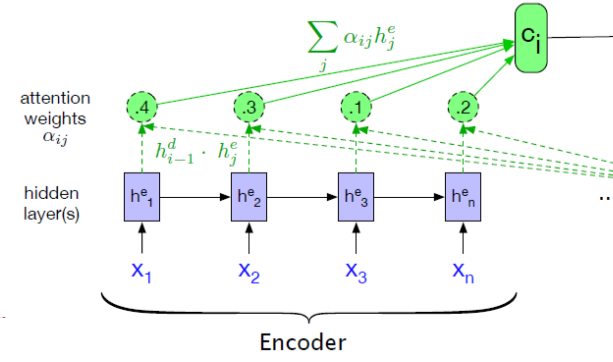
    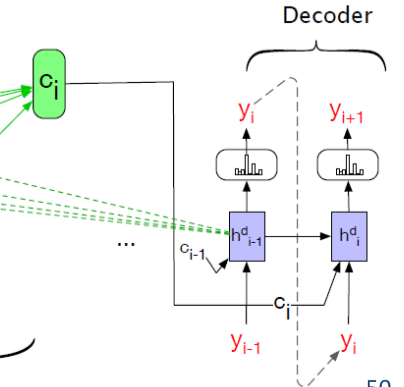

5. **Contextualized word embeddings**

- **Trasformers**:

    - trasformer capture long term dependencies in the input sequence by using attention mechanism.
    - use self-attention to compute a representation of the input sequence.
    - is encoder-decoder architecture.

        - encoder: 
            - input: sequence of tokens
            - encoder learns a representation of the input sequence.
            - output: give embedding of each token in the sequence to send to decoder.

        - decoder:
            - input: embedded words from encoder 
            - output: target sequence of tokens.   
                     
          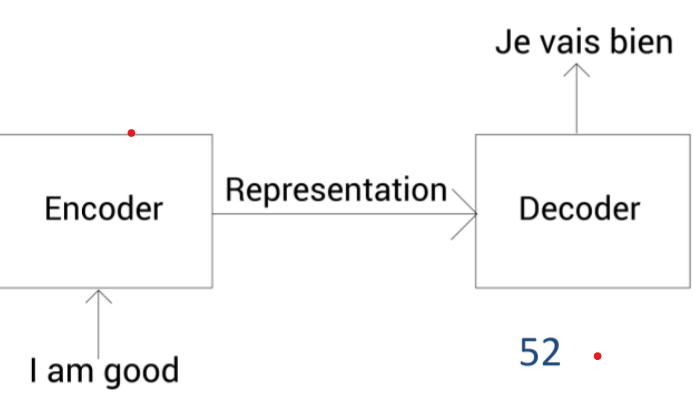 

- **Trasformer encoder**:
    - consist on a stack of N encoders.
    
    - output of each encoder is fed to the next encoder as input.
    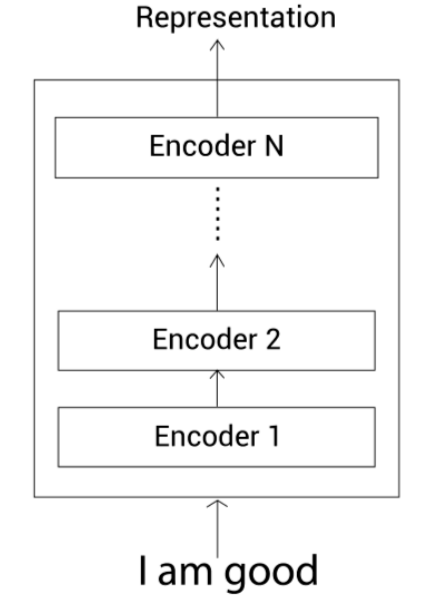

    - each encoder is composed of two sublayers:
        - multi-head self-attention 
        layer;
        - feed-forward network.
        
    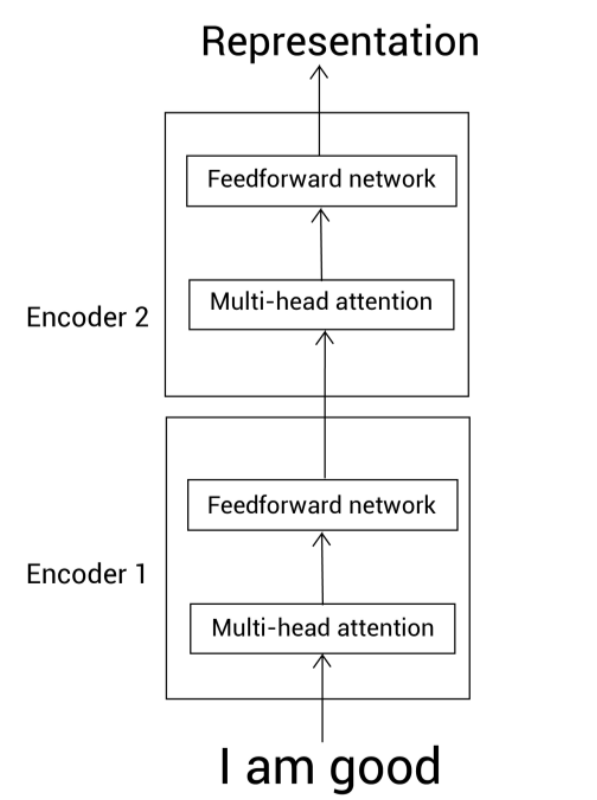

- **Self-Attention-Layer**:
    - Used to understand the relationship between different words in a sentence by computing a representation of the sentence that takes into account the relationship between all words.
    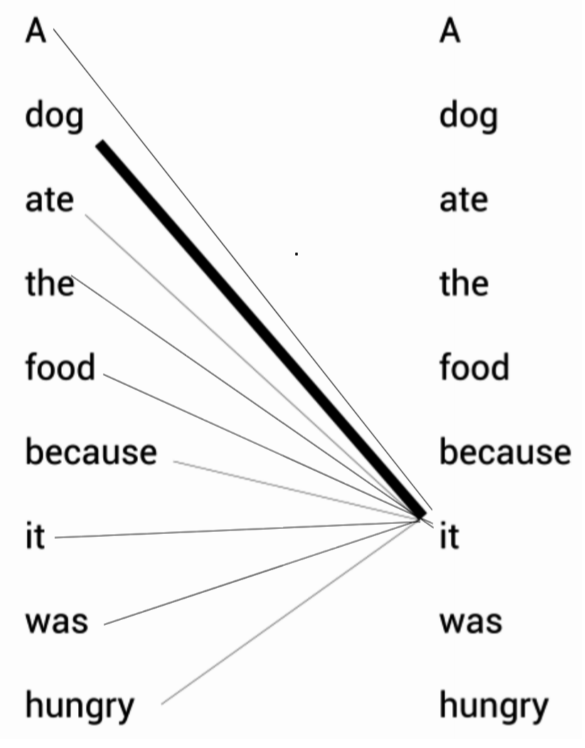

    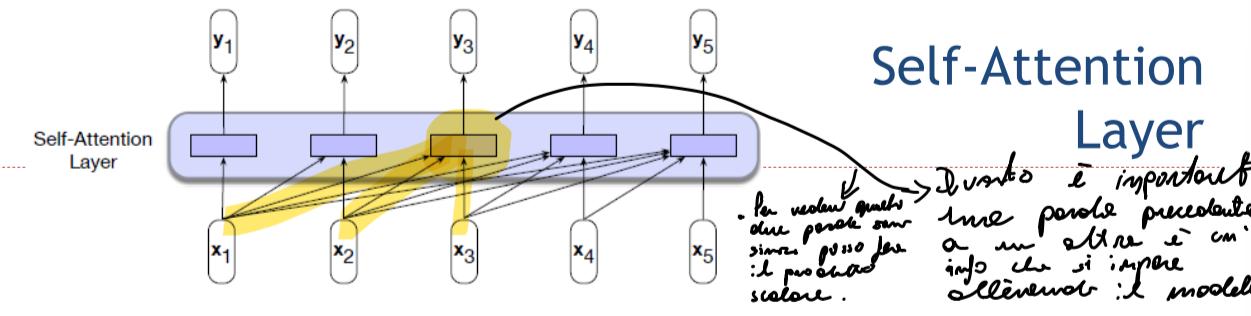
        
    - maps input sequence of tokens $x = (x_1, ..., x_n)$ to sequence of vectors $y = (y_1, ..., y_n)$ of same length.

    - to generate output $y_m$ the model has access to every input token ($x_1, ..., x_m$).
    
    - this ensure to create a LM that can be use for auto-regressive generation i.e. generate one token at a time.

- **Self-Attention-mechanism**

- provide a way to compare a word of interest to other words in the same sentence, to retrieve their relevance in the current context.
- this comparisons are used to compute an output for current input word.


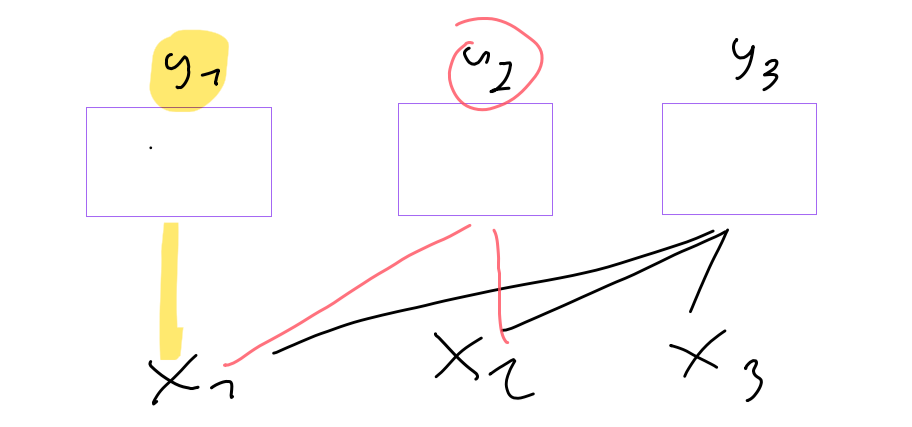
    
- es: to compute $y_3$ is necessary to compare $x_3$ with $x_1$, $x_2$ and $x_3$ itself.
- comparison in a self attention layer with dot-product:
- $score(x_i, x_j) = x_i * x_j$

- greater the dot product, more similar the two words are.

- Score is normalized using softmax function to obtain a probability distribution over all words in the sentence.

- $\alpha{ij} = softmax(score(x_i, x_j)) = \frac{exp(score(x_i, x_j))}{\sum_{k=1}^{n} exp(score(x_i, x_k))}, \forall j\leq i$;

- the probability distribution is used to compute a weighted sum of the input sequence.

- $y_i = \sum_{j\leq i}^{} \alpha_{ij} * x_j$


- **idea**:
    - compute a representation of the input sequence by computing a weighted sum of the input sequence.

    - each input token is associated with three vectors:

        - Query vector $q$;
        - Key vector $k$;
        - Value vector $v$;

    - Introducing weight matrices $W_q$, $W_k$ and $W_v$ each of this are used to compute the query, key and value vectors for each input $x_i$.
    - $W_q$ have dimension $d_{model} * d_q$;
    - $W_k$ have dimension $d_{model} * d_k$;
    - $d_{model}$ is the dimension of the input sequence;
    - $d_q$ and $d_k$ have to match to allow the dot product between query and key vectors;
    - $W_v$ have dimension $d_{model} * d_v$;

    - **query vector**:
        - is the current focus of attention. Is used to compute the similarity between the current input token and the previous input tokens of the sequence.
        - $q_i = W_q * x_i$, the query vector for the i-th input token.
    - **key vector**:
        - is the previous input token respect to the current input, used to compute the score.
        - $k_i = W_k * x_i$, the key vector for the i-th input token.
    
    - **value vector**:
        - used to compute the weighted sum of the input sequence, aka the output fot the current focus of attention.

        - $v_i = W_v * x_i$, the value vector for the i-th input token.

    - **score function**:
        - $score(x_i, x_j) = \frac{q_i * k_j}{\sqrt{d_k}}$
            - measure the similarity between the actual focus of attention and the previous input token.
        - dot product has been scaled by $\sqrt{d_k}$ to avoid large values of the dot product, this avoid numerical issue during training.
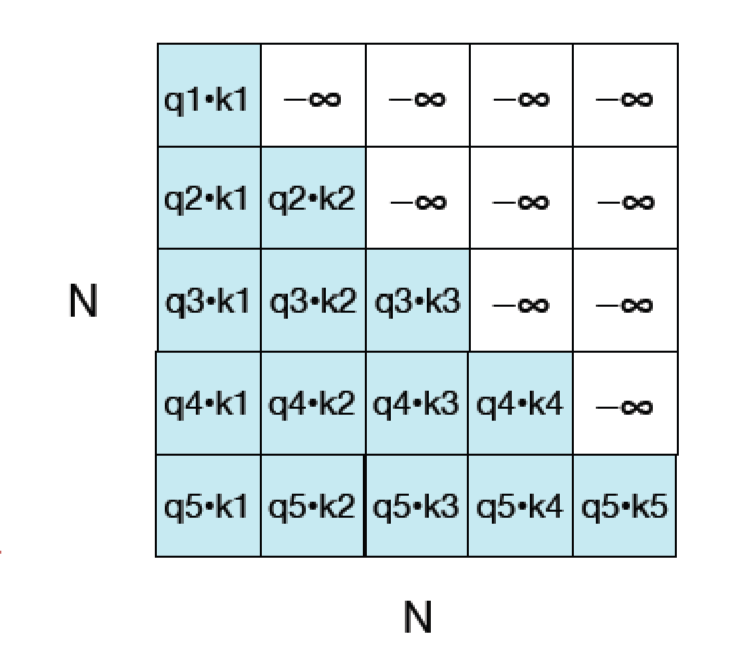

- Attention is quadratic in the length of the input sequence.
- most application have to limit the length of the input sequence to a certain number of tokens.
        
    
- **softmax function**:
    - $softmax(score(q_i, k_j)) = \frac{exp(score(q, k))}{\sum_{j=1}^{n} exp(score(q, k))}$
    - give the weights to each key vector.
    - **Output at time step i**:
    - $y_i = \sum_{j \leq i}^{} softmax(score(q_i, k_j)) * v_j$
    - is the i-th output of the self attention layer.
    - computed as weighted sum of the value vectors.
    - each $y_i$ is computed independently from the others.
    - this allow to compute the output in parallel.
    - entire process is parallelized by packing input sequence (embeddig) of N tokens into a single  matrix $X \in \mathbb{R}^{N \times d_{model}}$.

    - $Q = X * W_q$
    - $K = X * W_k$
    - $V = X * W_v$
    - $SelfAttention(Q, K, V) = softmax(\frac{Q * K^T}{\sqrt{d_k}}) * V$
    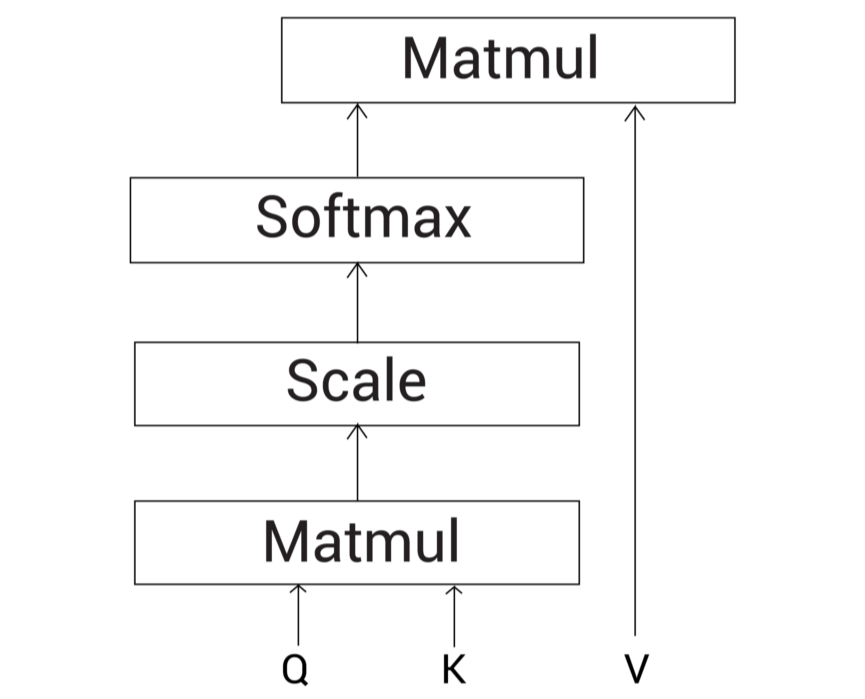

- **Trasformer Bloks**:  
    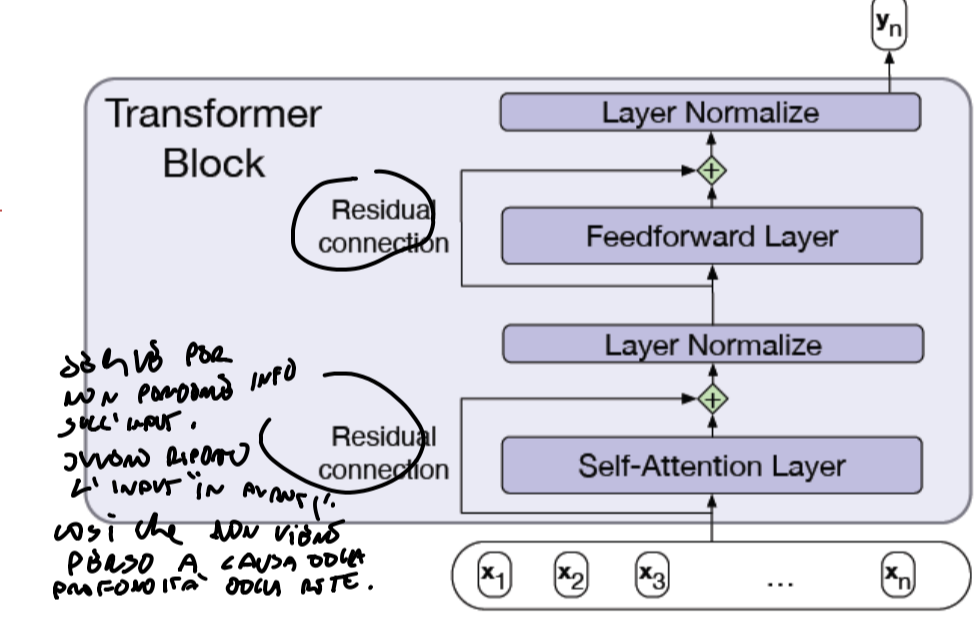
    - Given input sequence $x = (x_1, ..., x_n)$
    - pass it in self attention layer to obtain a sequence of vector $SelfAttention(x)$

    - to $SelfAttention(x)$ is added the input sequence $x$ with a residual connection.

    - Residual connection is used to avoid to lose input information.

    - after residual connection is applied a normalization layer.

    - $LayerNorm(SelfAttention(x) + x)$

    - $LayerNorm = \gamma * \frac{x - \mu}{\sigma} + \beta$ 
    - $\gamma$ and $\beta$ are learnable parameters.
    - improve the training process because every input sequence will be in the same range of values.
    - having input in the same range of values, the model will be able to learn faster and avoid overfitting  

- **multi-head attention**:
- Introduced to capture different relationships between different words in a sentence.
- use multiple self-attention layers in parallel to represent the input sequence in different ways.
- each self-attention layer is called head.
- each head is composed of three weight matrices $W^Q_i$, $W^K_i$ and $W^V_i$.
- each head is computed independently and is a diifferent embedding of the input sequence.
- each head is concatenated and multiplied by a weight matrix $W^O$ to obtain the final output of the multi-head attention layer $y$.
    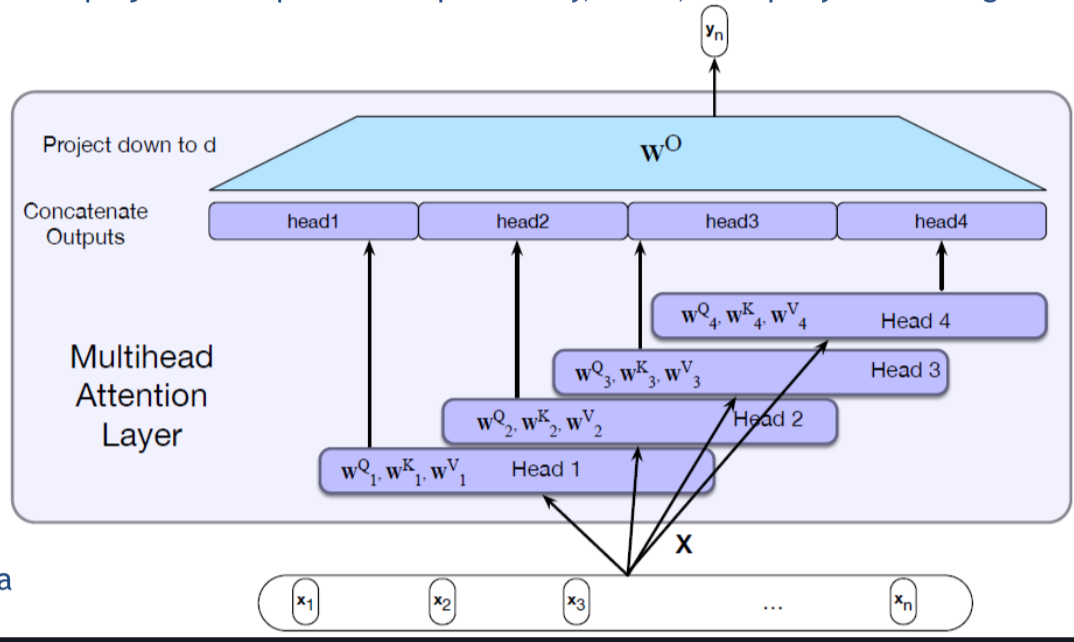
    - $MultiHead(Q, K, V) = Concat(head_1, ..., head_h) * W^O$
    - $head_i = Attention(Q * W^Q_i, K * W^K_i, V * W^V_i)$
    - $W^Q_i \in \mathbb{R}^{d_{model} \times d_k}$
    - $W^K_i \in \mathbb{R}^{d_{model} \times d_k}$
    - $W^V_i \in \mathbb{R}^{d_{model} \times d_v}$
    - $W^O \in \mathbb{R}^{hd_v \times d_{model}}$
    - $d_k = d_v = \frac{d_{model}}{h}$
    - $h$ is the number of heads.
    - $d_{model}$ is the dimension of the input sequence, aka the embedding dimension for each token.
    - $d_k$ and $d_v$ are the dimension of the key and value vectors.

- **Positional Encoding**:
    - since we fed the input sequence to the self-attention layer in parallel, the self-attention layer is not able to capture the order of the input sequence.

    - to capture the order of the input sequence is added a positional encoding to the input sequence.

    - positional encoding is a vector of the same dimension of the input sequence.

    - each element of the positional encoding is a function of the position of the token in the input sequence.
    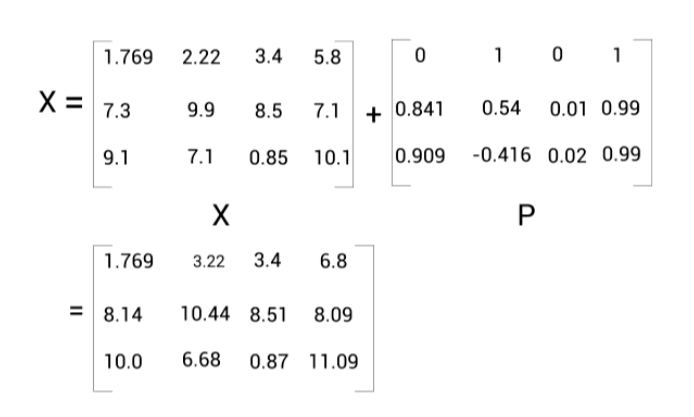
    (non necessario per esame sapere le formule)
    - $PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}})$
    - $PE_{(pos, 2i+1)} = cos(pos / 10000^{2i / d_{model}})$
    - $d_{model}$ is the dimension of the input sequence.
    - $PE_{(pos, i)}$ is the i-th element of the positional encoding for the token at position $pos$ 
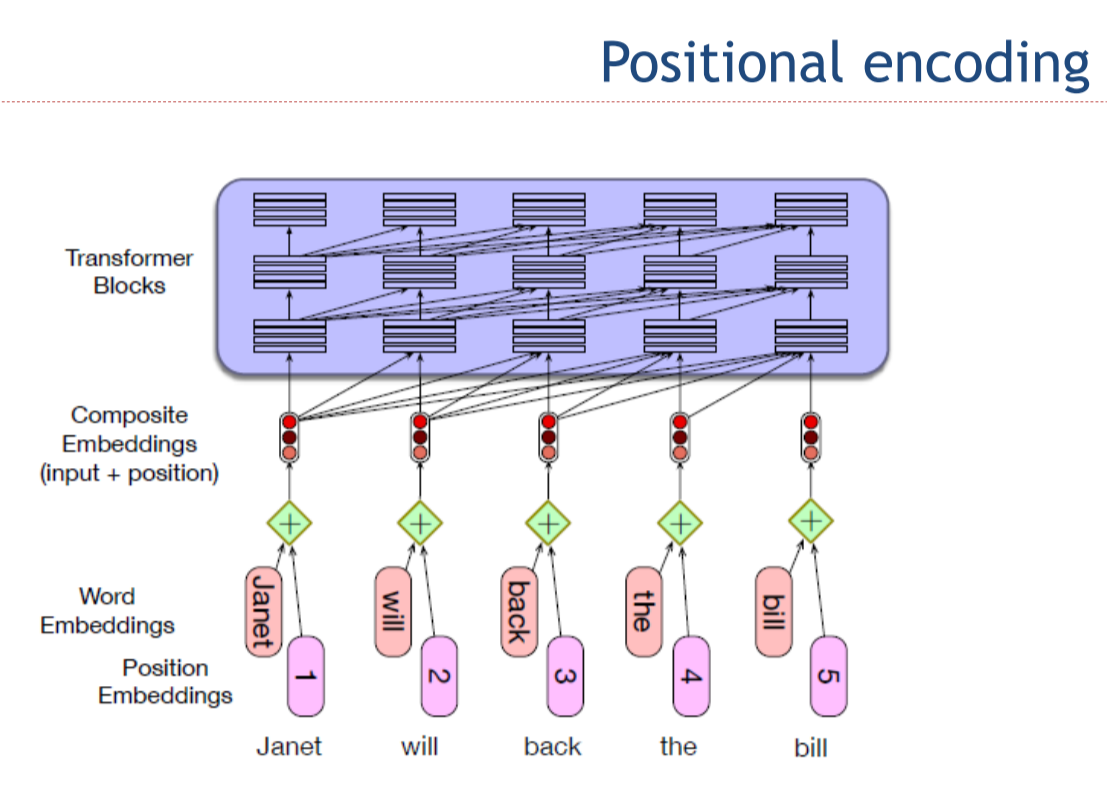

- **Basic idea of BERT**: (Bidirectional Encoder Representations from Transformers)
    - It is a context-based model
    - Unlike other embedding models like Word2Vec BERT is able to capture the meaning of a word based on the context in which it is used.
    - ex: Consider the following two sentences:      
        - Sentence A: He got bit by Python.         
        - Sentence B: Python is my favorite programming language.
        - The meaning of the word 'Python' is different in both sentences

    - Context-free embedding model such as word2vec, give the same embedding of the word 'Python'.

    - BERT will give different embeddings for the word 'Python' based on the context.


- **Loss Logistic regression
$ L(\theta) = - \frac{1}{N} \sum_{i=1}^{N} y_i log(\hat{y_i}) + (1 - y_i) log(1 - \hat{y_i})$



